In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()
customer_df.info()

(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.columns= customer_df.columns.str.lower()
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [12]:
numeric_data = customer_df.select_dtypes(include=[np.number])
categorical_data = customer_df.select_dtypes(exclude=[np.number])

In [13]:
numeric_data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [16]:
numeric_data["number_of_open_complaints"].unique()


array([0, 2, 1, 3, 5, 4], dtype=int64)

In [17]:
numeric_data["number_of_policies"].unique()

array([1, 8, 2, 7, 9, 4, 3, 6, 5], dtype=int64)

In [18]:
numeric_data["months_since_policy_inception"].unique()

array([ 5, 42, 38, 65, 44, 94, 13, 68,  3,  7, 87, 82, 25, 10, 50, 59,  1,
       21, 49, 91, 47, 64, 54,  6, 14, 56, 17, 40, 62, 86, 79, 15, 32, 28,
       16,  4, 57, 77, 95, 26, 53, 12, 98, 36, 71, 60, 20,  0, 27, 48, 33,
       83, 30, 69, 90, 81, 84, 88, 18, 11, 85, 93, 34, 89,  2, 70, 37, 43,
        8, 35, 99, 55, 75, 51, 92, 29, 63, 61, 46, 41, 31, 45, 67, 22, 23,
        9, 72, 96, 58, 66, 73, 39, 19, 97, 52, 76, 78, 80, 74, 24],
      dtype=int64)

In [26]:
def split_df(numeric_data, number_unique=6):
    
    discrete_cols = []
    continuous_cols = []
    
    for col in numeric_data.columns:
        if (numeric_data[col].nunique() < number_unique):
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)
            
    return numeric_data[discrete_cols], numeric_data[continuous_cols]
    

df1, df2 = split_df(numeric_data, number_unique=10)

display(df1.head())
display(df2.head())



,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


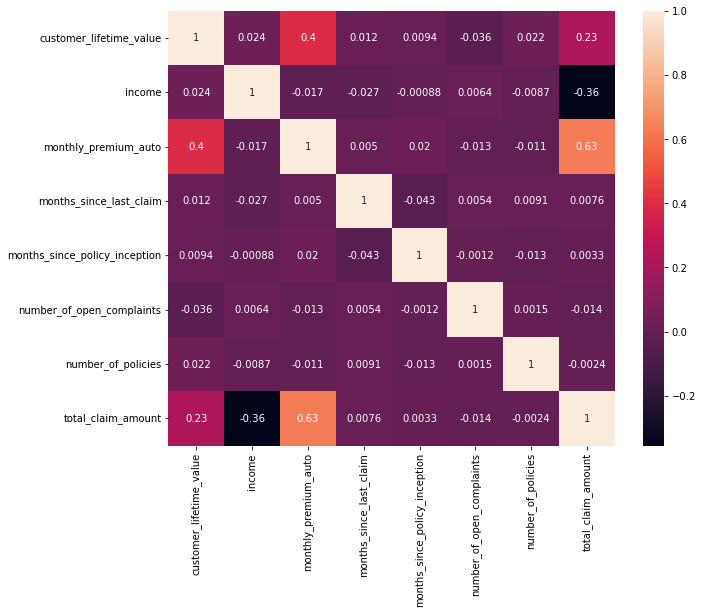

In [31]:
corr_matrix=numeric_data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

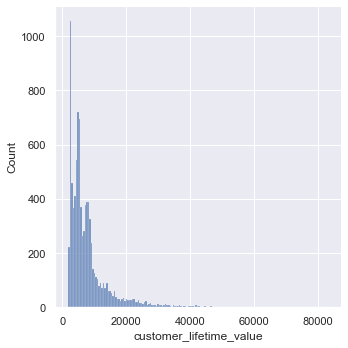

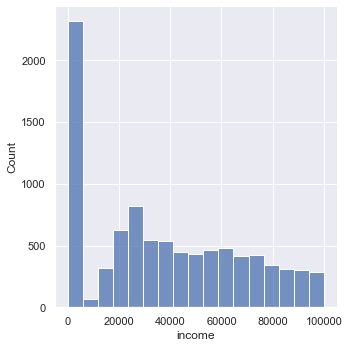

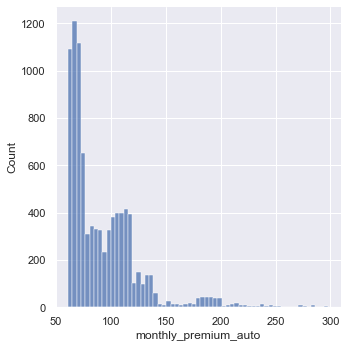

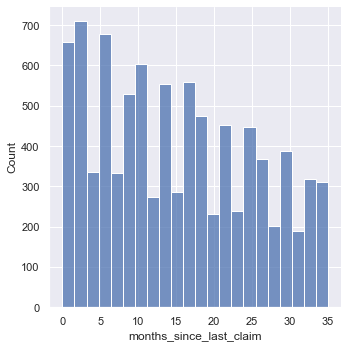

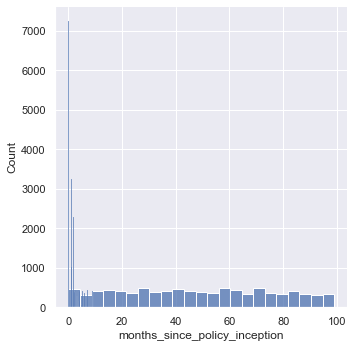

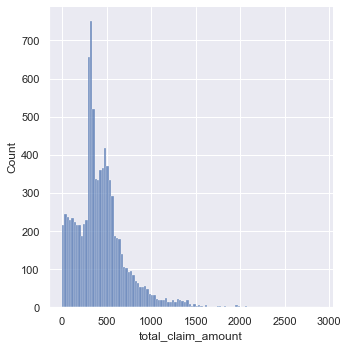

In [60]:
def split_df(numeric_data, number_unique=6):
    for col in numeric_data.columns:
        if (numeric_data[col].nunique() < number_unique):
            sns.histplot(x=col,data=numeric_data)
        else:
            sns.displot(x=col,data=numeric_data)
split_df(numeric_data,10)

In [ ]:
#most columns seem to not be correlated toe ach other at all. The only correlations that might be 'monthly_premium_auto'
#and 'total_claim_ampunt' which makes sense because the people that pay more for their premium have higher claims. 
#Also, income and total_claim_amount are negatively correlated which means that when the income is lower those claims are also lower, chich seems logical as people with a lower incomer might make lower claims to avoid getting their premium price raised. 

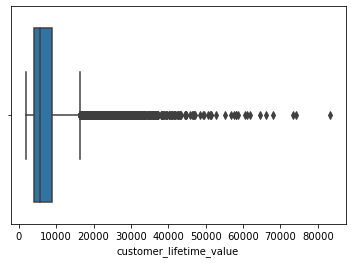

In [33]:
sns.boxplot(x="customer_lifetime_value", data=numeric_data)
plt.show()

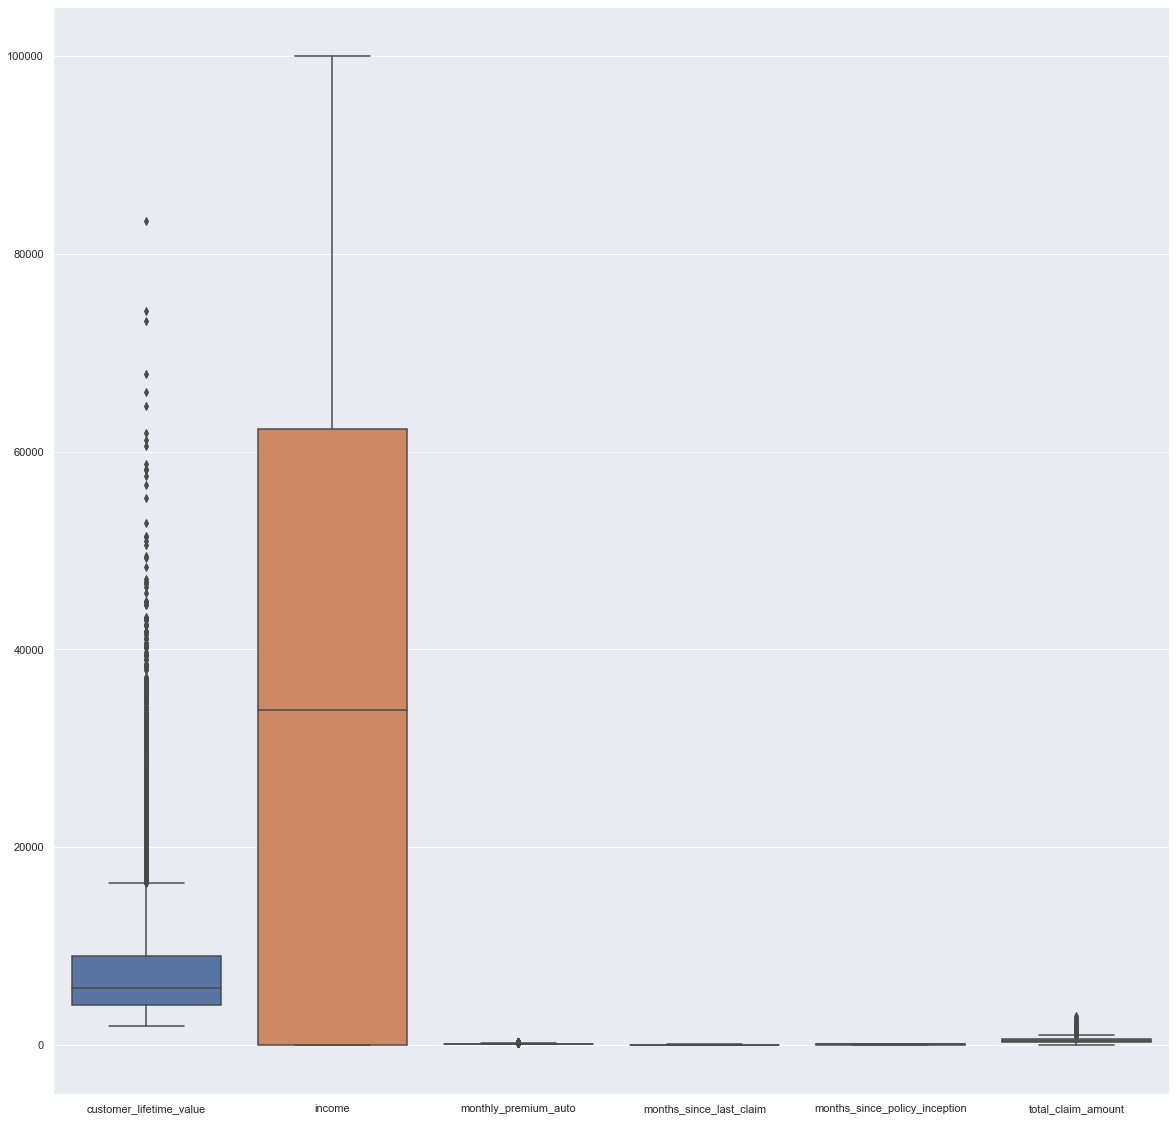

In [55]:

sns.boxplot(data=df2)

plt.show()

In [56]:
#there seem to be no outliers in income and very few in the rest except for customer_lifetime_value which has quite a lot of outliers

In [ ]:
#I think that making customer_lifetime_value into categories cu¡ould help slve the problem. The highest category would have a much bigger range of values than the others but class inbalance could be avoided by separating the categories using quantiles. 

In [59]:
numeric_data.isnull().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [ ]:
#there are no null values in any of the nueric columns 